In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_7 = pd.read_csv("/content/drive/MyDrive/Хакатон/tinkoff_hackathon_data/avk_hackathon_data_train_transactions.csv")


In [4]:
# менять тип даты и запихиваем ее в индекс
data_7['transaction_dttm'] = pd.to_datetime(data_7['transaction_dttm'])
data_7.set_index('transaction_dttm', inplace = True)

In [5]:
# делаем таблички по категориям по одному юзеру (37 таблиц)
def category_user(user_number, data):
  categories = data['category'].unique()
  answer_table = list(map(lambda x: data[(data['category'] == x) & (data['account_rk'] == user_number)], categories))
  answer_data_series = list(map(lambda x: x[['transaction_amt_rur']], answer_table))
  return answer_table, answer_data_series

# считаем месячные траты по категориям
def month_sum(data_series_user):
  answer = list(map(lambda x: x.resample("M").sum(), data_series_user))
  return answer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

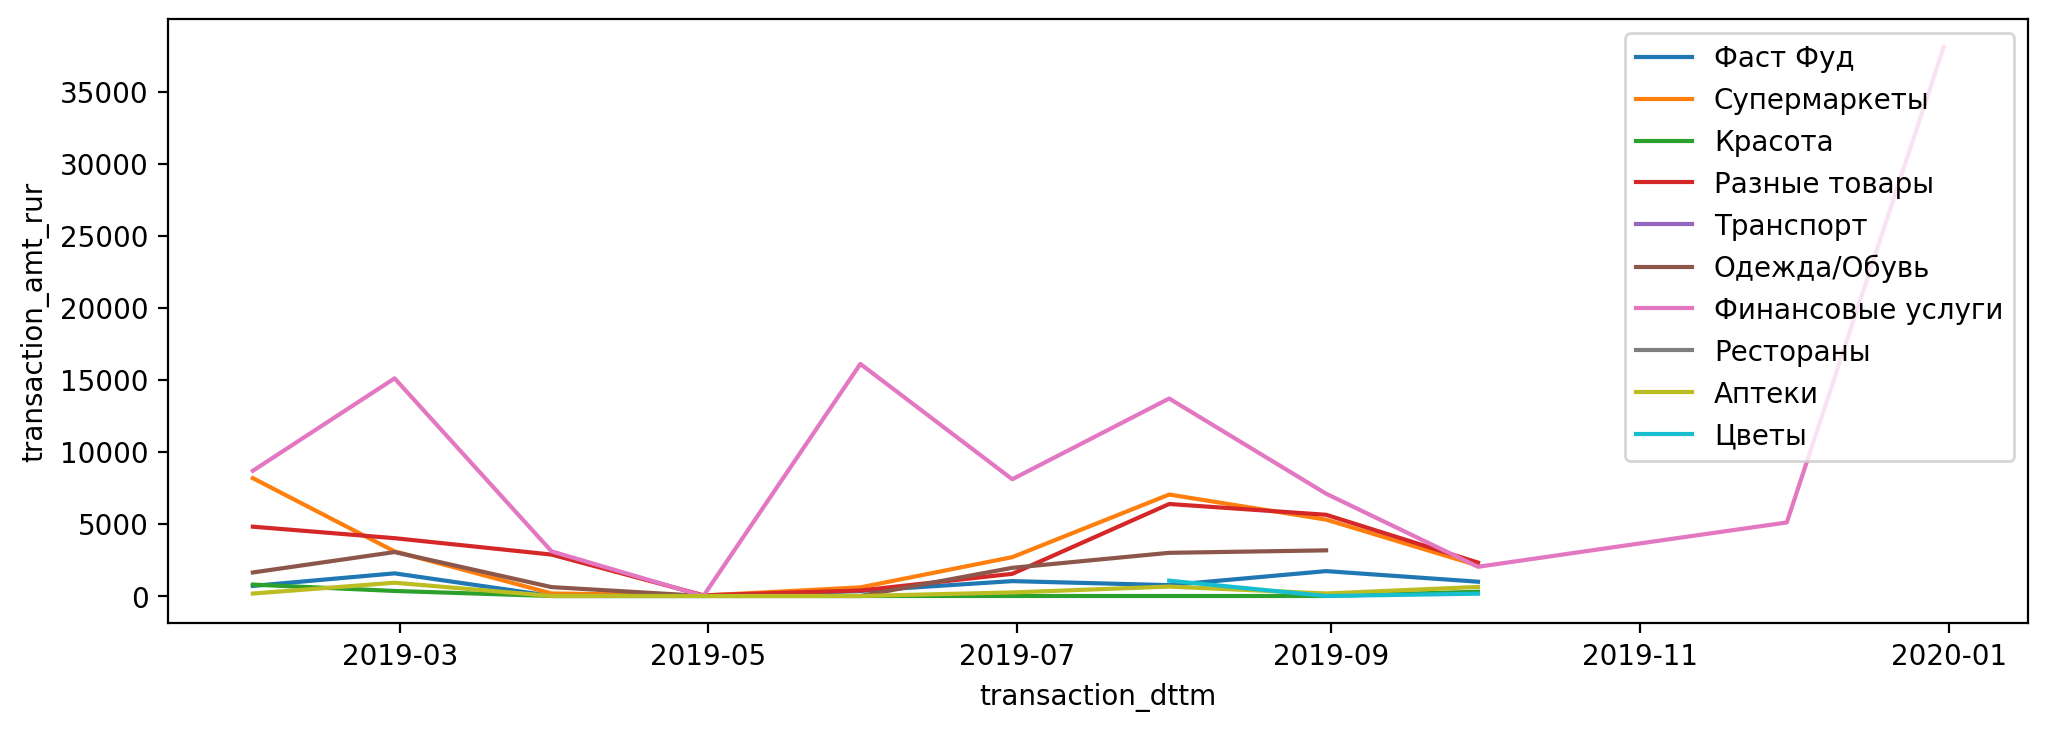

In [6]:
# рисуем
a, b = category_user(72991, data_7)
c = month_sum(b)
plt.subplots(figsize=(12, 4), dpi=200)
categories = data_7['category'].unique()
counter = 0
for category in c:
    sns.lineplot(category.index, category['transaction_amt_rur'], label = categories[counter]),
    counter += 1